In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
import wikipedia
import spacy
from textblob import TextBlob

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline, make_union, FeatureUnion

## Mini Review Lab (50 Minutes)

There are a lot of moving pieces in NLP and it is worthwhile to keep practicing the techniques we started to acquire yesterday. 

The first section of our lesson today will be a chance to review those topics and to practice discussing NLP and machine learning together. 

We'll be using a truncated version of the [Amazon Fine Food Review](https://www.kaggle.com/snap/amazon-fine-food-reviews/data) dataset. For a larger project, we would make use of the full set of data. However, in the interest of processing time, we'll use a randomly sampled set of 10,000 reviews for our training set and an additional 2,000 reviews for our test set.

Your goal will be to create a predictive model that classifies a review into a high scoring review (5 stars) or not a high scoring review (1-4 stars). This value is already present in the data under the name `high_score`.

In [ ]:
train = pd.read_csv('./datasets/amazon_train.csv')
train.head()

In [ ]:
X = train['Text']
y = train['high_score']

In [ ]:
y.unique()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [ ]:
y_train.head()

In [ ]:
from nltk.stem import PorterStemmer
import string

In [ ]:
def cleaner(text):
    stemmer = PorterStemmer()
    stop = stopwords.words('english')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.lower().strip()
    final_text = []
    for w in text.split():
        if w not in stop:
            final_text.append(stemmer.stem(w.strip()))
    return ' '.join(final_text)

In [ ]:
y.mean()

In [ ]:
cv = CountVectorizer(preprocessor=cleaner)
Xtrain_cv = cv.fit_transform(X_train)
Xtrain_cv.shape

In [ ]:
tsvd = TruncatedSVD(n_components=500)
Xtrain_tsvd = tsvd.fit_transform(Xtrain_cv)

In [ ]:
plt.plot(range(3000), tsvd.explained_variance_ratio_.cumsum())

In [ ]:
lg = LogisticRegression()
params = {'penalty':['l1','l2'],
         'C':[0.01,0.50,0.75]}

gs = GridSearchCV(lg, param_grid=params, scoring='recall', n_jobs=-1, verbose=2)

In [ ]:
gs.fit(Xtrain_tsvd, y_train)

In [ ]:
gs.best_params_

In [ ]:
gsb = gs.best_estimator_
print(gs.best_score_)

In [ ]:
Xtest_cv = cv.fit_transform(X_test)
Xtest_tsvd = tsvd.fit_transform(Xtest_cv)

In [ ]:
gsb.score(Xtest_tsvd, y_test)

In [ ]:
params = {'lg__penalty':['l1','l2'],
         'lg__C':[0.25,0.5,0.75,10]}

lg_pipe = Pipeline([('cv', CountVectorizer(stop_words='english', min_df=0.01)),
                    ('tsvd', TruncatedSVD(n_components=500)),
                   ('lg', LogisticRegression())])


In [ ]:
gs = GridSearchCV(lg_pipe, param_grid=params, scoring='recall', n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

In [ ]:
gsb = gs.best_estimator_
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
print(gsb.score(X_train, y_train))
print(gsb.score(X_test, y_test))
print('\n')
print(confusion_matrix(y_test, gsb.predict(X_test)))
print('\n')
print(classification_report(y_test, gsb.predict(X_test)))

# ---------------------------------------------------------------------------------------------------------

In [ ]:
cv = CountVectorizer(preprocessor=cleaner)

X_cv = cv.fit_transform(X_train)

X_cv.shape

tsvd = TruncatedSVD(n_components=10)
X_tsvd = tsvd.fit_transform(X_cv)

rfc = RandomForestClassifier()
rfc.fit(X_tsvd, y_train)
print('rfc score:', rfc.score(X_tsvd, y_train))
print('confusion matrix:' , confusion_matrix(y_train, rfc.predict(X_tsvd)))
print('classification report:', classification_report(y_train, rfc.predict(X_tsvd)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid= {'C': [0.01,.10, 1.0, 10.0],
            'penalty': ['l1', 'l2']}

gs = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='recall', n_jobs=-1, verbose=2)
gs.fit(X_tsvd, y_train)



In [ ]:
print('gs best params:', gs.best_params_)

In [ ]:
print('gs best score:', gs.best_score_)

In [ ]:
X_test_cv = cv.transform(X_test)
X_test_svd = tsvd.transform(X_test_cv)
# print('rfc score:', rfc.score(X_test_svd, y_test))
# print('confusion matrix:', confusion_matrix(y_test, rfc.predict(X_test_svd)))
# print('classifcation report:', classification_report(y_test, rfc.predict(X_test_svd)))

In [ ]:
best_estimator = gs.best_estimator_

In [ ]:
print('gs best estimatoor:', best_estimator.score(X_test_svd, y_test))
print('confusion matrix:', confusion_matrix(y_test, gs.predict(X_test_svd)))
print('classifcation report:', classification_report(y_test, gs.predict(X_test_svd)))

## Ajinth's code

In [ ]:
'''Setting up the Targets and Features '''
X = train['Text']
y = train['high_score']

Xn = test['Text']
yn =test['high_score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


'''Setting up the TFIDVectorizer'''
tf = TfidfVectorizer(stop_words='english')

'''Intantiating Logreg'''
logreg = LogisticRegression()


'''Setting up the Parameters for GridSearch'''
params = {

    'logreg__penalty': ['l1', 'l2'], 
    'logreg__C': [1.0,10,100], 
    'logreg__max_iter': [100,150,200]   
}

'''Setting the Pipeline'''
logreg_tk_pipe = Pipeline([('vect', tf), 
                     ('logreg', logreg)])

'''Fitting the Model on Training'''
gs_logreg = GridSearchCV(logreg_tk_pipe, param_grid=params,n_jobs = -1, verbose=2, scoring='accuracy')
gs_logreg.fit(X_train, y_train)


print ('Best Params: ' , gs_logreg.best_params_) 
print ('Best Score: ', gs_logreg.best_score_)
print ('Train-Train Score: ',gs_logreg.score(X_train, y_train))
print ('Train-Test Score: ', gs_logreg.score(X_test, y_test))
print ('Real Test Score: ', gs_logreg.score(Xn, yn))
print ('Confusion Matrix \n')
print (confusion_matrix(yn, gs_logreg.predict(Xn)))
print ('Classification Report\n')
print (classification_report(yn, gs_logreg.predict(Xn)))

Split into pairs and work together to do the following.

#### Model Generation (30 Minutes)

1. Try and create a predictive model that identifies whether a review will be a high-scoring review or not (`high_score` feature in the data). While you can use any of the NLP techniques we discussed yesterday, here are some areas to focus on:

1. Should you use `CountVectorizer` or `TfidfVectorizer` to transform your DataFrame?
    - Keep stop words or drop them?
    - Limit the words going in using `max_df` or `min_df`?
2. Apply dimensionality reduction using `TruncatedSVD` or not?
    - If you do, how many components should you keep?
3. What modeling technique should you use? (`LogisticRegression`, `RandomForestClassifier`, etc.?) How will you change the hyperparameters.

Make sure that you are checking your model's performance against the test set.

#### Discussion (10 Minutes)

A pair from each market will come on mic and discuss how they've chosen to transform their data. Additionally, we'll compare the **mean accuracy** for each market to see who has (at this point) made the most predictive model.

#### Model Refinement (10 Minutes)

Continue to refine your model or include some choices made by other markets. At the end of these 10 minutes, we'll report each market's best finding (and final model) by mic. 

# NLP Techniques

Today's lesson is designed as an introduction to more advanced libraries or techniques in the realm of Natural Language Processing. These techniques can help you gain even greater accuracy in your modeling, but require more in-depth knowledge of new libraries, new techniques, etc. 

While we'll be introducing a lot of new material today, we'll be doing our best to limit the discussion to what is most immediately helpful. Each of these libraries and techniques has much more going on than we have time to discuss this week and we encourage you to spend time investigating and understanding these libraries. However, **mastery of these libraries, techniques, and materials introduced today is not required nor expected.**

For Project 4 and your Capstone Project, if you are pursuing an NLP approach, these libraries may be very helpful. However, you can get a lot of mileage out of refining and using the sklearn libraries that we discussed yesterday. A good workflow is to try simple answers first and move into more advanced techniques as your use-case requires -- your goals as modelers should be to make best choice that you can, contingent on time and use-case. Having something work, but not be 100% correct is better than having something 100% correct that doesn't work yet. 

## Using `spacy` to extract parts of speech and named entities

[`spaCy`](https://spacy.io/) is a large-scale NLP and text processing library designed to help you extract useful information from text in a speedy and accurate manner. You can imagine it like `CountVectorizer()` turned up to 11. It has underpinnings to C to increase speed and a focus on usability.

`spaCy` does *so* much more than we are able to discuss at this point. It is quickly becoming the go-to library for text processing and feature extraction for text. Today, we'll use it to extract parts of speech and named entities.

### Parts of Speech

We may want to use some derived statistics about parts of speech in our work as Data Scientists, either as the inputs to a model (document _x_ is _y_% verbs) or to help us modify the inputs to a model (we may want to treat `book` the verb differently than `book` the noun). While many different libraries can do parts of speech (`textblob`, which we'll introduce shortly, can do that as well), we'll introduce this using `spaCy`.

First, we set up some text from Wikipedia to parse:

In [2]:
chicago = wikipedia.page('chicago')

print(chicago.content[0:500])

Chicago ( ( listen) or ), officially the City of Chicago, is the third-most populous city in the United States. With over 2.7 million residents, it is also the most populous city in both the state of Illinois and the Midwestern United States. It is the county seat of Cook County. The Chicago metropolitan area, often referred to as Chicagoland, has nearly 10 million people and is the third-largest in the United States. Chicago has often been called a global architecture capital and is considered 


Next, let's create sentences by splitting on `.`:

In [3]:
chicago_sents = chicago.content.split('. ')
chicago_sents[0:5]

['Chicago ( ( listen) or ), officially the City of Chicago, is the third-most populous city in the United States',
 'With over 2.7 million residents, it is also the most populous city in both the state of Illinois and the Midwestern United States',
 'It is the county seat of Cook County',
 'The Chicago metropolitan area, often referred to as Chicagoland, has nearly 10 million people and is the third-largest in the United States',
 'Chicago has often been called a global architecture capital and is considered one of the most important business centers in the world.\nChicago was incorporated as a city in 1837 near a portage between the Great Lakes and the Mississippi River watershed and grew rapidly in the mid-nineteenth century']

Next, we'll set up a model in `spaCy`. This lets `spaCy` know what to use as its internal corpus. We name this model `nlp` by default:

In [34]:
nlp = spacy.load('en')

In [ ]:
chicago_sents[1]

Then, we'll feed a sentence into `nlp`. This will automatically split the text into a generator of tokens (one token to each word). These tokens will have the part of speech already tagged in it:

In [14]:
doc = nlp(chicago_sents[1])
print(doc)
for token in doc:
    print(token.text, token.pos_)

With over 2.7 million residents, it is also the most populous city in both the state of Illinois and the Midwestern United States
With ADP
over ADP
2.7 NUM
million NUM
residents NOUN
, PUNCT
it PRON
is VERB
also ADV
the DET
most ADV
populous ADJ
city NOUN
in ADP
both CCONJ
the DET
state NOUN
of ADP
Illinois PROPN
and CCONJ
the DET
Midwestern PROPN
United PROPN
States PROPN


If we wanted to convert this into a set of part of speech tags, we could add in a little extra Python to do so:

In [6]:
tags = {}
for token in doc:
    if token.pos_ not in tags.keys():
        tags[token.pos_] = 1
    else:
        tags[token.pos_] += 1
print(tags)

{'ADP': 4, 'NUM': 2, 'NOUN': 3, 'PUNCT': 1, 'PRON': 1, 'VERB': 1, 'ADV': 2, 'DET': 3, 'ADJ': 1, 'CCONJ': 2, 'PROPN': 4}


There are many more tags to that `spaCy` can provide for us:

- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalisation, punctuation, digits.
- is alpha: Is the token an alpha character?
- is stop: Is the token part of a stop list, i.e. the most common words of the language?

In [ ]:
sent = 'I am in a bootcamp right now and it has become a difficult challenge for me.'
doc= nlp(sent)
for token in doc:
    print(token.text, token.pos)

In [ ]:
sent = "I love to watch my watch tick"
doc = nlp(sent)
for token in doc:
    print(token.text, token.pos)

In [7]:
print('\t'.join(['Text', 'Lemma', 'POS', 'Detailed POS', 'Dependency',
                'Shape', 'Is alphabetic?', 'Is stopword?']))
for token in doc:
    print('\t'.join([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, str(token.is_alpha), str(token.is_stop)]))

Text	Lemma	POS	Detailed POS	Dependency	Shape	Is alphabetic?	Is stopword?
With	with	ADP	IN	prep	Xxxx	True	False
over	over	ADP	IN	quantmod	xxxx	True	True
2.7	2.7	NUM	CD	compound	d.d	False	False
million	million	NUM	CD	nummod	xxxx	True	False
residents	resident	NOUN	NNS	pobj	xxxx	True	False
,	,	PUNCT	,	punct	,	False	False
it	-PRON-	PRON	PRP	nsubj	xx	True	True
is	be	VERB	VBZ	ROOT	xx	True	True
also	conjurer	ADV	RB	advmod	xxxx	True	True
the	the	DET	DT	det	xxx	True	True
most	much	ADV	RBS	advmod	xxxx	True	True
populous	populous	ADJ	JJ	amod	xxxx	True	False
city	city	NOUN	NN	attr	xxxx	True	False
in	in	ADP	IN	prep	xx	True	True
both	both	CCONJ	CC	predet	xxxx	True	True
the	the	DET	DT	det	xxx	True	True
state	state	NOUN	NN	pobj	xxxx	True	False
of	of	ADP	IN	prep	xx	True	True
Illinois	illinois	PROPN	NNP	pobj	Xxxxx	True	False
and	and	CCONJ	CC	cc	xxx	True	True
the	the	DET	DT	det	xxx	True	True
Midwestern	midwestern	PROPN	NNP	compound	Xxxxx	True	False
United	united	PROPN	NNP	compound	Xxxxx	True	False
States	

### Check For Understanding 1 (10 minutes)

With a partner, do the following:

1. Pick two different wikipedia articles
2. Get the content using the `wikipedia` library
3. Using `spacy`, derive the following:
    1. How many tokens are in your article?
    2. How many parts of speech are in each article? How often do they occur?
    3. As a percentage of the total number of tokens, how often does each part of speech occur?
4. Does it look like there's a difference across your documents? What other types of documents would have different distributions of parts of speech?

In [39]:
lamprey = wikipedia.page('Lamprey')

print(lamprey.content[0:500])

Lampreys (sometimes also called, inaccurately, lamprey eels) are any jawless fish of the order Petromyzontiformes, placed in the superclass Cyclostomata. The adult lamprey may be characterized by a toothed, funnel-like sucking mouth. The common name "lamprey" is probably derived from Latin lampetra, which may mean "stone licker" (lambere "to lick" + petra "stone"), though the etymology is uncertain.
There are about 38 known extant species of lampreys. Parasitic species are the best known, and fe


In [40]:
hagfish = wikipedia.page('Hagfish')
print(hagfish.content[0:500])

Hagfish, the class Myxini (also known as Hyperotreti), are eel-shaped, slime-producing marine fish (occasionally called slime eels). They are the only known living animals that have a skull but no vertebral column, although hagfish do have rudimentary vertebrae. Along with lampreys, hagfish are jawless; they are the sister group to vertebrates, and living hagfish remain similar to hagfish from around 300 million years ago.
The classification of hagfish had been controversial. The issue was wheth


In [41]:
lamprey = lamprey.content.split('. ')
lamprey

['Lampreys (sometimes also called, inaccurately, lamprey eels) are any jawless fish of the order Petromyzontiformes, placed in the superclass Cyclostomata',
 'The adult lamprey may be characterized by a toothed, funnel-like sucking mouth',
 'The common name "lamprey" is probably derived from Latin lampetra, which may mean "stone licker" (lambere "to lick" + petra "stone"), though the etymology is uncertain.\nThere are about 38 known extant species of lampreys',
 'Parasitic species are the best known, and feed by boring into the flesh of other fish to suck their blood; but only 18 species of lampreys are parasitic',
 'Parasitic lampreys also attach themselves to larger animals to get a free ride',
 'Adults of the non-parasitic species do not feed; they live off reserves acquired as ammocoetes (larvae), which they obtain through filter feeding.\nThe lampreys are a very ancient lineage of vertebrates, though their exact relationship to hagfishes and jawed vertebrates is still a matter of 

In [ ]:
hagfish_sents = hagfish.content.split('. ')
hagfish_sents[0:5]

In [ ]:
nlp = spacy.load('en')

lamp = nlp(lamprey[0:5])

for token in lamp:
    print(token.text, token.pos)

In [ ]:
tags = {}
for token in lamp:
    if token.pos_ not in tags.keys():
        tags[token.pos_] = 1
    else:
        tags[token.pos_] += 1
print(tags)

In [8]:
print('\t'.join(['Text', 'Lemma', 'POS', 'Detailed POS', 'Dependency',
                'Shape', 'Is alphabetic?', 'Is stopword?']))
for token in doc:
    print('\t'.join([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, str(token.is_alpha), str(token.is_stop)]))

Text	Lemma	POS	Detailed POS	Dependency	Shape	Is alphabetic?	Is stopword?
With	with	ADP	IN	prep	Xxxx	True	False
over	over	ADP	IN	quantmod	xxxx	True	True
2.7	2.7	NUM	CD	compound	d.d	False	False
million	million	NUM	CD	nummod	xxxx	True	False
residents	resident	NOUN	NNS	pobj	xxxx	True	False
,	,	PUNCT	,	punct	,	False	False
it	-PRON-	PRON	PRP	nsubj	xx	True	True
is	be	VERB	VBZ	ROOT	xx	True	True
also	conjurer	ADV	RB	advmod	xxxx	True	True
the	the	DET	DT	det	xxx	True	True
most	much	ADV	RBS	advmod	xxxx	True	True
populous	populous	ADJ	JJ	amod	xxxx	True	False
city	city	NOUN	NN	attr	xxxx	True	False
in	in	ADP	IN	prep	xx	True	True
both	both	CCONJ	CC	predet	xxxx	True	True
the	the	DET	DT	det	xxx	True	True
state	state	NOUN	NN	pobj	xxxx	True	False
of	of	ADP	IN	prep	xx	True	True
Illinois	illinois	PROPN	NNP	pobj	Xxxxx	True	False
and	and	CCONJ	CC	cc	xxx	True	True
the	the	DET	DT	det	xxx	True	True
Midwestern	midwestern	PROPN	NNP	compound	Xxxxx	True	False
United	united	PROPN	NNP	compound	Xxxxx	True	False
States	

### Named Entities

Named entities are business, people, countries, or other things that refer to a specific person, place, or thing (think `Apple`, computer manufacturer versus `apple`, delicious crunchy fruit). `spaCy` can identify named entities for us, which we can either highlight or drop from our analyses. 

Once we've parsed a string of text using `spaCy`, we can call out the named entities using the `.ents` attribute:

In [10]:
sent = 'I love to watch my watch tick'
doc = nlp(sent)
for token in doc:
    print(token.text, token.pos_)

I PRON
love VERB
to PART
watch VERB
my ADJ
watch NOUN
tick NOUN


In [11]:
print(doc, type(doc))

I love to watch my watch tick <class 'spacy.tokens.doc.Doc'>


In [15]:
for named_entity in doc.ents:
    print(named_entity.text, named_entity.label_)

over 2.7 million CARDINAL
Illinois GPE
the Midwestern United States GPE


`spaCy` provides a set of labels for each type of named entity:

|Label|Description|
|:-- | :-- |
|PERSON |	People, including fictional. |
|NORP |	Nationalities or religious or political groups. |
|FACILITY |	Buildings, airports, highways, bridges, etc. |
|ORG |	Companies, agencies, institutions, etc. |
|GPE |	Countries, cities, states. |
|LOC |	Non-GPE locations, mountain ranges, bodies of water. |
|PRODUCT |	Objects, vehicles, foods, etc. (Not services.) |
|EVENT |	Named hurricanes, battles, wars, sports events, etc. |
|WORK_OF_ART |	Titles of books, songs, etc. |
|LAW |	Named documents made into laws. |
|LANGUAGE |	Any named language.|
|DATE |	Absolute or relative dates or periods. |
|TIME |	Times smaller than a day. |
|PERCENT |	Percentage, including "%".
|MONEY |	Monetary values, including unit. |
|QUANTITY |	Measurements, as of weight or distance. |
|ORDINAL |	"first", "second", etc. |
|CARDINAL |	Numerals that do not fall under another type. |

If we wanted to see all the unique named entities in the Chicago page, for example:

In [16]:
chicago.content[0:500]

'Chicago ( ( listen) or ), officially the City of Chicago, is the third-most populous city in the United States. With over 2.7 million residents, it is also the most populous city in both the state of Illinois and the Midwestern United States. It is the county seat of Cook County. The Chicago metropolitan area, often referred to as Chicagoland, has nearly 10 million people and is the third-largest in the United States. Chicago has often been called a global architecture capital and is considered '

In [19]:
chicago_model = nlp(chicago.content)
named_entities = []
for entity in chicago_model.ents:
    named_entities.append(entity.text)
print(set(named_entities), len(set(named_entities)))

{'26 miles', 'Miro', '1987', 'Rahm Emanuel', 'Two', 'Lake Calumet Harbor', 'Ireland', 'Showtime', 'Hispanic', "People's Parade", "the United States'", 'Ferris', 'North', 'the Hubbard Street Dance Chicago', 'Dutch Wheels', 'roughly 4%', 'Montgomery Ward', '510', '26%', 'more than 100,000', 'From 1995 to 2008', 'The Fourth Presbyterian Church', '26th Street', '41', '2006', 'the Museum of Broadcast Communications', 'the 1940s', 'between 1851 and 1920', 'the Chicago Medical School', 'about 2 days', 'three days', 'Chase Bank', 'over 780,000 square meters', 'Checagou', 'The Chicago Symphony Orchestra', '1893', 'summer', 'Financial Times', '0.7%', 'Taste of Chicago', '2020', 'the Standard Oil Building', 'WMVP', 'Great Lakes', '10,000', 'WMAQ 5', 'Five', 'four consecutive years', '96', 'Buckingham Fountain', 'the City Beautiful Movement', '290', 'GE Transportation', 'Cook County Jail', 'The Roman Catholic Archdiocese', '46', 'Muslims', 'Burnham Park', 'West Loop', 'since 1945', 'the Chicago Hi

 1537


### Check for Understanding 2 (10 Minutes)

As a market (or as groups in your market), please discuss the following:

1. As modelers, we will frequently have to make decisions about how to transform data. If you were using NLP to predict things, would it make sense to keep named entities? Would it make sense to drop them? If it would depend on the circumstances, under what circumstances would it make sense to keep or drop named entities?

We'll have a couple of markets come on mic to discuss cases they identified where keeping named entities might make sense and cases where it would not make sense.

## Using `textblob` to do sentiment analysis

We can also use a library known as [`textblob`](https://textblob.readthedocs.io/en/dev/) to do a **lot** of text transformation and extraction on our behalf. For our purposes, we are going to use it to analyze text and derive the overall sentiment of the text.

Sentiment can be split into two related scales:

- subjectivity (0 to 1): scores closer to 0 are more objective in tone, scores closer to 1 are more subjective in tone
- polarity (-1 to 1): scores closer to -1 are more negative in tone, closer to 0 are more neutral, and closer to 1 are more positive in tone.

Using `textblob` is user-friendly -- pass a string into a `Textblob()` class and then call the `.sentiment.polarity` or `sentiment.subjectivity` attributes:

In [27]:
really_good_review = '''
Goodness me, what a fantastic movie. 
Caught the world premiere at the Toronto International Film Festival and 
the entire theater laughed until they cried. 
Amazingly directed, HILARIOUSLY funny, it blends a 1930s gangster 
stylishness into a Hong Kong kung fu movie to astonishing results. 
Who would've thought you could top Shaolin Soccer? 
Not me, until I saw this movie. Stephen Chow pulled it off. 
Chow's comedic timing gets better and better with every movie 
he makes, and while his films are depending more and more on 
CGI these days, and makes this movie much more a fantasy kung 
fu film than a traditional one, it hardly detracts from the 
enjoyable experience. Make it your mission to see this film - 
it will be one of the most entertaining you ever see. 
I can't remember the last film I enjoyed myself in more. 
My eyes still hurt from wiping away tears of laughter. Seriously.  
'''

really_bad_review = '''
Thank you for coming into your performance review Mr. Smith.
The company is concerned about your performance. Lately your work has 
been subpar and at times counter to this company's stated goals.
Your demeanor has been aggresive and at times hostile to your 
fellow coworkers.
We have no choice but to terminate your employment, effective 
immediately. Thank you.
'''

In [48]:
good_review = TextBlob(really_good_review)
print(good_review.sentiment.subjectivity, good_review.sentiment.polarity)

bad_review = TextBlob(really_bad_review)
print(bad_review.sentiment.subjectivity, bad_review.sentiment.polarity)

0.5749999999999998 0.33295454545454545
0.7 0.15


### Check for Understanding 3 (5 Minutes)

Individually, please answer the following:

1. What type of subjectivity and polarity scores would you expect wikipedia articles to have?
2. Confirm your hypothesis by using `textblob` on some of the wikipedia pages we have used so far. Were your thoughts confirmed?

In [51]:
lamprey = wikipedia.page('lamprey')
lamprey_textblob = TextBlob(lamprey.content)

In [53]:
print('subjectivity score:', lamprey_textblob.sentiment.subjectivity)
print('polarity score:', lamprey_textblob.sentiment.polarity)

subjectivity score: 0.42203660749730604
polarity score: 0.07442584925991039


In [50]:
good_lamprey = TextBlob(lamprey.content)
print(good_lamprey.sentiment.subjectivity, good_lamprey.sentiment.polarity)

0.42203660749730604 0.07442584925991039


### Adding these features to DataFrames

We may want to include these features into a DataFrame for use in a later model. The most straightforward way to do so would be to apply them using Pandas.

Here, we'll make use of the same dataset on economic news that we used yesterday. 

In [54]:
econ = pd.read_csv('datasets/economic_news.csv',
                  usecols=[7, 11, 14],
                  nrows=200)
econ['text'] = econ['text'].apply(lambda x: x.replace('</br>', ''))
econ['relevance'] = econ['relevance'].apply(lambda x: 1 if x == 'yes' else 0)
econ.head()

,relevance,headline,text
0,1,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,0,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal OnlineThe Morning Brie...
2,0,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,0,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,1,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [55]:
X_train, X_test, y_train, y_test = train_test_split(econ[['text']],
                                                   econ['relevance'],
                                                   test_size=0.50,
                                                   random_state=8675309)

Let's use `spaCy` to create a column for the number of monetary-based named entities, followed by using `textblob` to create a polarity score for each article.

While we can try to put this into a lambda function, it will probably be easiest in this case to define four functions and apply them.

However, because we're sequentially loading up each row of data and processing it, this can be a little bit of a time and memory sink. Expect processing to take some extra time for this step.*

* **note**: for spacy, there are faster ways to process the data that do not involve pushing it through Pandas. Investigate the spacy `pipe` method if you're looking to do a larger amount of text transformation.

In [56]:
def number_of_monetary_ents(text):
    text = nlp(text)
    return len([x.text for x in text.ents if x.label_ == 'MONEY'])

def polarity(text):
    text = TextBlob(text)
    return text.sentiment.polarity

In [58]:
X_train['num_monetary'] = X_train['text'].apply(number_of_monetary_ents)

In [59]:
X_train['num_monetary'].describe()

count    100.000000
mean       1.420000
std        2.123367
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        8.000000
Name: num_monetary, dtype: float64

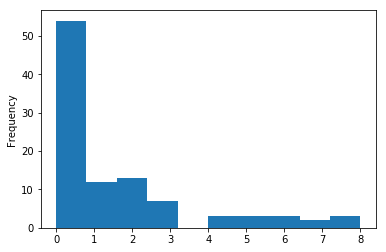

In [61]:
X_train['num_monetary'].plot(kind='hist')

In [62]:
X_train['polarity'] = X_train['text'].apply(polarity)

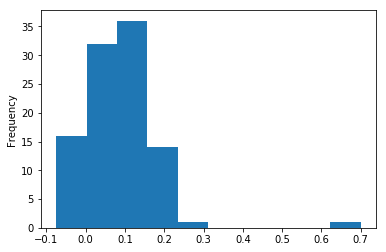

In [63]:
X_train['polarity'].describe()
X_train['polarity'].plot(kind='hist')

We could also pass this into a predictive model to see if these features can assist predicting economic status:

In [64]:
rfc = RandomForestClassifier()
rfc.fit(X_train[['num_monetary', 'polarity']], y_train)
print(rfc.score(X_train[['num_monetary', 'polarity']], y_train))
predictions = rfc.predict(X_train[['num_monetary', 'polarity']])
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.95
[[79  0]
 [ 5 16]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        79
          1       1.00      0.76      0.86        21

avg / total       0.95      0.95      0.95       100



In [65]:
X_test['num_monetary'] = X_test['text'].apply(number_of_monetary_ents)
X_test['polarity'] = X_test['text'].apply(polarity)
print(rfc.score(X_test[['num_monetary', 'polarity']], y_test))
predictions = rfc.predict(X_test[['num_monetary', 'polarity']])
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.64
[[61  6]
 [30  3]]
             precision    recall  f1-score   support

          0       0.67      0.91      0.77        67
          1       0.33      0.09      0.14        33

avg / total       0.56      0.64      0.56       100



**Note**: you're probably wondering _why_ we would try these things when they don't seem to immediately help. During a larger project, we will likely spend days if not weeks on feature extraction and analysis and will want to make as many useful features as possible to make as good a model as possible. Other techniques may involve more nuanced modeling, such as looking at the sequence of parts of speech, etc. Part of this lesson is designed to expose to what is out there so that when faced with a situation where those techniques may be useful, you're aware of their existence.

## Assigning documents to topics using LDA

LDA (Latent Dirichlet Allocation) is an unstructured machine learning technique that iteratively attempts to find clusters of words that are likely to happen together across multiple documents. We interpret the co-occurance of these words together to be analgous to different topics discussed in across a body of documents. 

LDA works by iteratively guessing how likely a given word is to be part of a given topic until we tell it to stop. 

This process of updating probabilities will make more sense after next weeks lectures on Bayes, but we'll quickly discuss here and move forward.

(Explanation cribbed from [Introduction to Latent Dirichlet Allocation](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/))

We begin by picking a set of documents and a number of topics that we want to generate. One way that we do this is what's known as collapsed Gibbs saampling. We do the following:

1. Randomly assign every word in every document to one of the $k$ topics:
    - $w$: a word in a document
    - $d$: a document
    - $k$: a topic
2. At this point, every word has a likelihood that they belong in a given a topic, based on the other words in documents that they exist in. 
3. Iterate through every word in every document and:
    1. Assume that every other word has the correct likelihood that they belong to each topic (so, `apple` might have a distribution of `[0.1, 0.1, 0.2, 0.4, 0.2]` for five topics.
    2. Look at the likelihood of seeing word $w$ in document $d$ and adjust the topic probabilities as needed
    > for example, if there are a lot of words in topic 1 in document $d$ and word $w$ has a stronger likelihood of being in topic 2, because we're assuming that every **other** distribution is correct, we should change our understanding of where word $w$ belongs and tweak it more in favor of belonging to topic 1, not topic 2
    
You can kind of interpret this with an analogy:

> Imagine you move to a new town and you don't know what sort of people you want to hang out with. You imagine there's five different groups of people. You start visiting different places around town (the park, the library, the mall, etc.) and noting who's there. Everytime you go to a place you start adjusting your expectation on who you'll see there (such as the goths constantly are at the mall, so we should expect less and less that they'll show up at the library). This is (very roughly) analgous to what LDA is doing.

The name latent dirichlet allocation should begin to make more sense in this context:
- latent -- because we have no explicit marker of topic and are grouping things together based on features we are inferring, not seeing
- [dirichlet](https://en.wikipedia.org/wiki/Dirichlet_distribution) -- is a type of probability distribution for multiple vectors at once (like a bunch of words towards a bunch of topics)
- allocation -- we are allocating different words to different topics via this iterative updating of priors

Both sklearn and `gensim`, a library we will discuss in the context of a technique called `word2vec`, can handle LDA. However, we'll rely on the sklearn implementation here to reduce the amount of extra work we'll need to do in picking up a new library.

First, let's reimport all of the economic news data instead of just the first 200 rows:

In [68]:
econ = pd.read_csv('datasets/economic_news.csv',
                  usecols=[14])
econ['text'] = econ['text'].apply(lambda x: x.replace('</br>', ''))
econ.head()

,text
0,NEW YORK -- Yields on most certificates of dep...
1,The Wall Street Journal OnlineThe Morning Brie...
2,WASHINGTON -- In an effort to achieve banking ...
3,The statistics on the enormous costs of employ...
4,NEW YORK -- Indecision marked the dollar's ton...


Next, we'll transform the data using `CountVectorizer` and removing stop words:

In [69]:
cv = CountVectorizer(stop_words='english')
cv.fit(econ['text'].values)
X = cv.transform(econ['text'].values)
X

<8000x46379 sparse matrix of type '<class 'numpy.int64'>'
	with 802395 stored elements in Compressed Sparse Row format>

Next we'll instantiate an LDA and fit it to our sparse matrix of words. We have to provide a number of topics that we are looking for (in this case, we're looking for 5 topics). We'll also store the names of the each of the words created during the `CountVectorizer` step for use with the LDA results:

In [70]:
feature_names = cv.get_feature_names()
lda = LatentDirichletAllocation(n_topics=5)

lda.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=5,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

The results of our work will be held in the `.components_` feature. Each row of this array is one of our topics and each column (in order) is a word created by `CountVectorizer`. The values are the relative "likelihoods" that the word $w$ should be in topic $t$.

> From the sklearn docs, `.components_`: "can be viewed as pseudocount that represents the number of times word j was assigned to topic i. It can also be viewed as distribution over the words for each topic after normalization" (we could normalize by dividing row total for that topic). 

For our purposes, it's enough to say that bigger values means the word belongs more in that topic. 

In [71]:
print(lda.components_.shape)

(5, 46379)


In [72]:
results = pd.DataFrame(lda.components_,
                      columns=feature_names)

To see what words are most likely in each topic, we could sort by the biggest values for each topic.

> Every feature has a likelihood of being in a topic, just a very, very low one

In [73]:
for topic in range(5):
    print('Topic', topic)
    word_list = results.T[topic].sort_values(ascending=False).index
    print(' '.join(word_list[0:25]), '\n')

Topic 0
said million company year companies new stock billion industry 000 corp bank market business banks share securities percent loans home mortgage sales according credit based 

Topic 1
trade japan world china japanese countries united europe foreign european nations germany global international german currency west chinese tokyo american asia minister asian london south 

Topic 2
market year said stock rates new percent rate prices economy stocks average york investors inflation economic index growth week dollar rose fed dow federal points 

Topic 3
ыєs ыќ cent ыє ыєt ыу ыў ыуthe ыпthe рк ыпwe press ыпi ыуand rails ыєre today ыч ыпit ыќthe 10 ыпa col ing eisenhower 

Topic 4
said president federal tax economic government budget year years house new administration mr people state economy money congress deficit time spending chairman unemployment inflation states 



As we change the number of topics, we should see the topics change slightly. Remember that because this is an unstructured technique our editorial power as the modeler is important to identify useful topics. 

However, this provides a powerful tool to create summaries of larger bodies of documents!

### Check for Understanding 4 (20 Minutes)

In pairs, do the following:

1. Rerun the LDA, choosing 10 topics instead of 5. 
> Make sure that you can explain what each line of the code does to each other. This can be as generic as "This runs an LDA with 10 components on a matrix of words and documents" but it's important to be able to explain what a block of code is doing. In particular, make sure that you're able to explain what has happened in this line of code above `word_list = results.T[topic].sort_values(ascending=False).index` -- if you need to, start with the very first portion (`results`) and investigate what each subsequent step does.
2. Look at the results of your LDA. How would you summarize what each topic says?
3. Does 10 look to be a correct number of topics? Are the same words showing up in multiple topics? 

In [74]:
feature_names = cv.get_feature_names()
lda = LatentDirichletAllocation(n_topics=10)

lda.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=10,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [76]:
results = pd.DataFrame(lda.components_,
                      columns=feature_names)

In [78]:
for topic in range(10):
    print('Topic', topic)
    word_list = results.T[topic].sort_values(ascending=False).index
    print(' '.join(word_list[0:25]), '\n')

Topic 0
company million said county year corp business sales percent share based years like area executive 000 companies stores home people ford time district revenue says 

Topic 1
stock market new stocks york average dow points trading million index shares investors jones day week said industrial today rose prices fell year exchange 30 

Topic 2
dollar yen gold currency york new euro futures trading ap late traders exchange currencies marks foreign press japanese goldman court ounce commodity pound metals yesterday 

Topic 3
said new people workers work state federal 000 pay years million time national business jobs year american bank unemployment government loan job cost industry board 

Topic 4
billion market year rates money markets financial trade bank funds investors world fund said debt investment banks companies treasury mortgage years japan securities new bonds 

Topic 5
col martin ыє brimmer ыў lias ез lockheed 1953 ii mil hr tires tables coach arab northrop machine pf inher